In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mpld3

import rain

In [2]:
mpld3.disable_notebook()
#mpld3.enable_notebook()

In [20]:
FREQUENCY = 600

df = pd.read_csv(rain.toRelPath("data/df-cache.csv"))
df = df.iloc[::(1000 * FREQUENCY // 500), :]
df.reset_index(inplace = True)

mid = df["mid"]
mid.fillna(method = "bfill", inplace = True)
print(mid)

0      7436.995
1      7443.365
2      7444.240
3      7438.675
4      7423.825
5      7435.185
6      7450.050
7      7439.340
8      7438.525
9      7460.690
10     7465.395
11     7503.895
12     7559.835
13     7490.325
14     7481.580
15     7470.470
16     7412.630
17     7428.035
18     7371.105
19     7375.335
20     7402.425
21     7405.195
22     7382.115
23     7400.010
24     7350.955
25     7355.920
26     7348.945
27     7331.245
28     7363.285
29     7366.720
         ...   
582    7500.465
583    7489.465
584    7489.740
585    7501.795
586    7504.530
587    7502.500
588    7508.045
589    7527.400
590    7507.230
591    7524.345
592    7519.270
593    7511.985
594    7528.210
595    7517.515
596    7516.475
597    7520.270
598    7513.960
599    7523.985
600    7525.235
601    7527.005
602    7533.085
603    7521.180
604    7522.035
605    7522.265
606    7531.505
607    7526.435
608    7392.315
609    7419.700
610    7390.670
611    7380.075
Name: mid, Length: 612, 

Power portfolio adjusts: 17.40222070452594


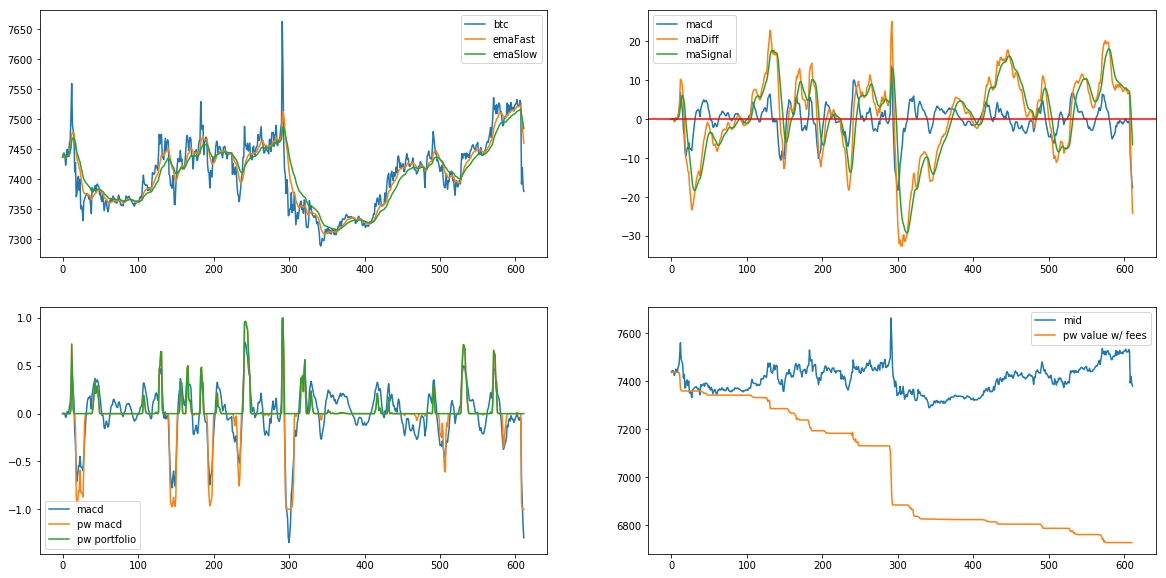

In [27]:
MACD_LEN_RATIO = [12, 26, 9]
MACD_LEN_MULTIPLIER = 1
FEE_RATIO = 25 * 1e-4

macdLens = [a * MACD_LEN_MULTIPLIER for a in MACD_LEN_RATIO]
macd, maDiff, maSignal, emaFast, emaSlow = rain.computeMACD(mid, macdLens[0], macdLens[1], macdLens[2])

pwMACD = np.power(np.tanh(macd / 3), 15)
pwPort = pwMACD.copy()
pwPort[pwPort < 0] = 0

dPWPort = pwPort.shift(-1) - pwPort
print("Power portfolio adjusts:", np.sum(dPWPort.abs()))

plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
plt.plot(mid, label = "btc")
plt.plot(emaFast, label = "emaFast")
plt.plot(emaSlow, label = "emaSlow")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(macd, label = "macd")
plt.plot(maDiff, label = "maDiff")
plt.plot(maSignal, label = "maSignal")
plt.axhline(y = 0, color = "r")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(macd / macd[macd.idxmax()], label = "macd")
plt.plot(pwMACD, label = "pw macd")
plt.plot(pwPort, label = "pw portfolio")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(mid, label = "mid")
plt.plot(rain.portfolioToValue(pwPort, mid, FEE_RATIO), label = "pw value w/ fees")
plt.legend()
plt.show()